/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported ind

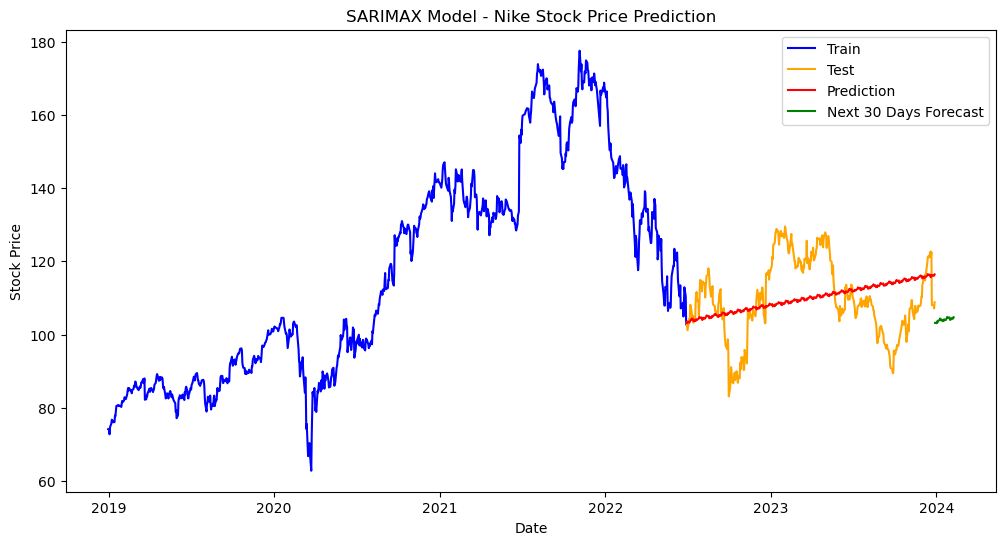

MAE: 9.45
MAPE: 8.78%
RMSE: 11.24
MSE: 126.38


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Đọc dữ liệu từ tệp Nike.csv
df = pd.read_csv('Nike.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Thay thế giá trị NaN bằng giá trị mean của cột "Close"
df['Close'].fillna(df['Close'].mean(), inplace=True)

# Chia thành tập train và test (tỉ lệ 7:3)
train_size = int(len(df) * 0.7)
train, test = df[:train_size], df[train_size:]

# Huấn luyện mô hình SARIMAX trên tập train
order = (1, 1, 1)  # Các tham số có thể điều chỉnh
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Dự đoán trên tập test
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Dự đoán cho 30 ngày tiếp theo
forecast_steps = 30
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(test.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean.values

# Tính toán độ đo chất lượng mô hình
mae = mean_absolute_error(test['Close'], predicted_mean)
mape = np.mean(np.abs((test['Close'].values - predicted_mean.values) / np.where(test['Close'] != 0, test['Close'], 1))) * 100
rmse = sqrt(mean_squared_error(test['Close'], predicted_mean))
mse = mean_squared_error(test['Close'], predicted_mean)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train', color='blue')
plt.plot(test['Close'], label='Test', color='orange')
plt.plot(test.index, predicted_mean, label='Prediction', color='red')
plt.plot(forecast_index, forecast_values, label='Next 30 Days Forecast', color='green')
plt.title('SARIMAX Model - Nike Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# In các độ đo chất lượng mô hình
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')


/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported ind

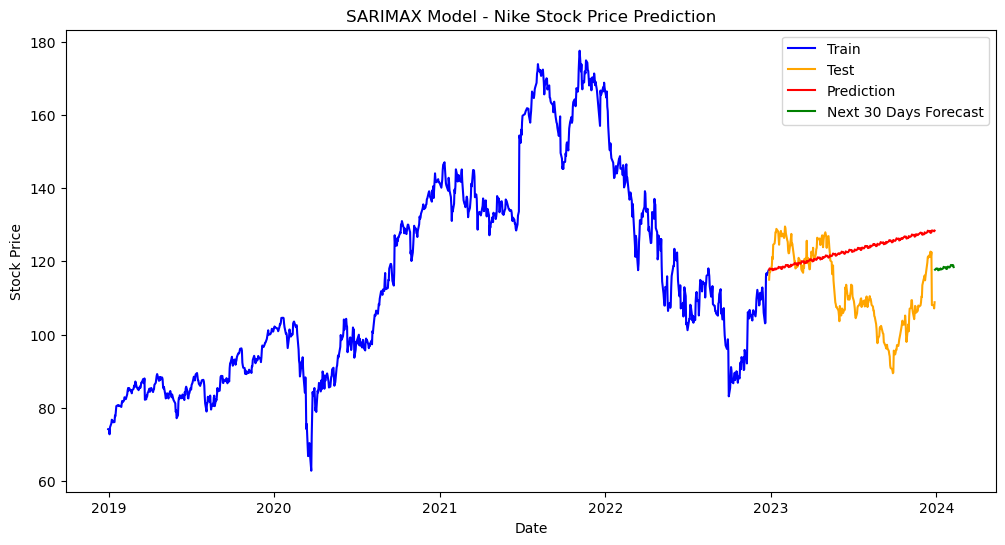

MAE: 13.37
MAPE: 12.70%
RMSE: 16.33
MSE: 266.54


In [129]:
# Chia thành tập train và test (tỉ lệ 8:2)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Huấn luyện mô hình SARIMAX trên tập train
order = (1, 1, 1)  # Các tham số có thể điều chỉnh
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Dự đoán trên tập test
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Dự đoán cho 30 ngày tiếp theo
forecast_steps = 30
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(test.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean.values

# Tính toán độ đo chất lượng mô hình
mae = mean_absolute_error(test['Close'], predicted_mean)
mape = np.mean(np.abs((test['Close'].values - predicted_mean.values) / np.where(test['Close'] != 0, test['Close'], 1))) * 100
rmse = sqrt(mean_squared_error(test['Close'], predicted_mean))
mse = mean_squared_error(test['Close'], predicted_mean)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train', color='blue')
plt.plot(test['Close'], label='Test', color='orange')
plt.plot(test.index, predicted_mean, label='Prediction', color='red')
plt.plot(forecast_index, forecast_values, label='Next 30 Days Forecast', color='green')
plt.title('SARIMAX Model - Nike Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# In các độ đo chất lượng mô hình
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')

/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/thanhnhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported ind

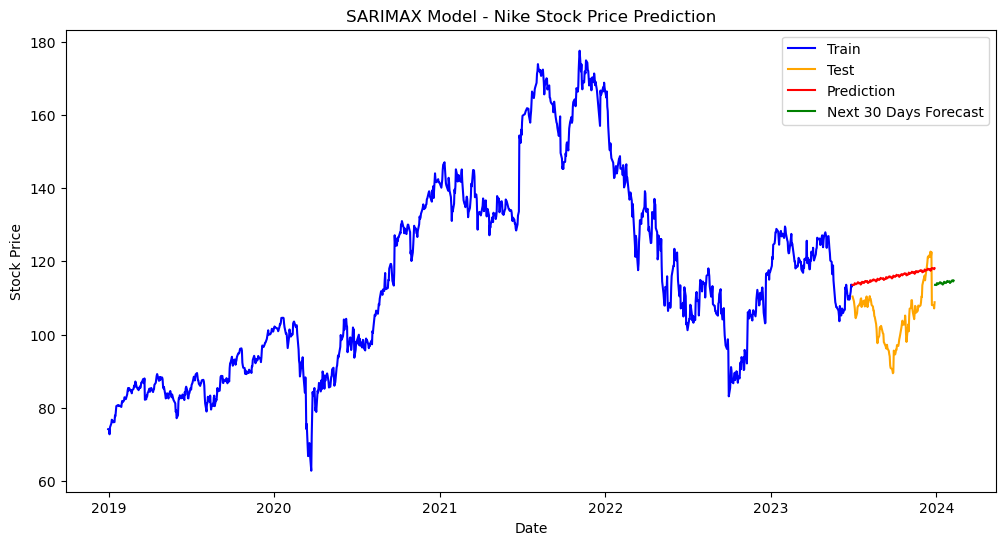

MAE: 11.15
MAPE: 11.06%
RMSE: 12.81
MSE: 164.10


In [130]:
# Chia thành tập train và test (tỉ lệ 9:1)
train_size = int(len(df) * 0.9)
train, test = df[:train_size], df[train_size:]

# Huấn luyện mô hình SARIMAX trên tập train
order = (1, 1, 1)  # Các tham số có thể điều chỉnh
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Dự đoán trên tập test
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Dự đoán cho 30 ngày tiếp theo
forecast_steps = 30
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(test.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean.values

# Tính toán độ đo chất lượng mô hình
mae = mean_absolute_error(test['Close'], predicted_mean)
mape = np.mean(np.abs((test['Close'].values - predicted_mean.values) / np.where(test['Close'] != 0, test['Close'], 1))) * 100
rmse = sqrt(mean_squared_error(test['Close'], predicted_mean))
mse = mean_squared_error(test['Close'], predicted_mean)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train', color='blue')
plt.plot(test['Close'], label='Test', color='orange')
plt.plot(test.index, predicted_mean, label='Prediction', color='red')
plt.plot(forecast_index, forecast_values, label='Next 30 Days Forecast', color='green')
plt.title('SARIMAX Model - Nike Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# In các độ đo chất lượng mô hình
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')